In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


In [3]:
df_populacao = pd.read_csv('static/populacao.csv')
df_frota = pd.read_csv('static/frota.csv')

df_populacao = df_populacao.loc[(df_populacao.ano>=2004)&(df_populacao.ano<=2020),['id_municipio', 'ano', 'populacao']]
df_frota = df_frota.loc[df_frota.mes==df_frota.mes.max(), ['id_municipio', 'ano', 'total']].rename(columns={'total': 'frota'})

df_estatistica = pd.merge(df_frota, df_populacao, on=['id_municipio','ano'])
df_estatistica['taxa'] = df_estatistica['frota'] / df_estatistica['populacao']



In [4]:
import requests
def get_id_municipios_uf(uf):
  url = f'https://servicodados.ibge.gov.br/api/v1/localidades/estados/{uf}/municipios'
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
      # municipios_name_list = [municipio['nome'] for municipio in data]
      municipios_id_list = [municipio['id'] for municipio in data]
      return municipios_id_list
  else:
      raise ValueError('Erro ao fazer requisição: ' + response.status_code)


(array([ 2.,  6.,  4.,  8., 12.,  9.,  4.,  5.,  3.,  5.]),
 array([25686. , 30641.6, 35597.2, 40552.8, 45508.4, 50464. , 55419.6,
        60375.2, 65330.8, 70286.4, 75242. ]),
 <BarContainer object of 10 artists>)

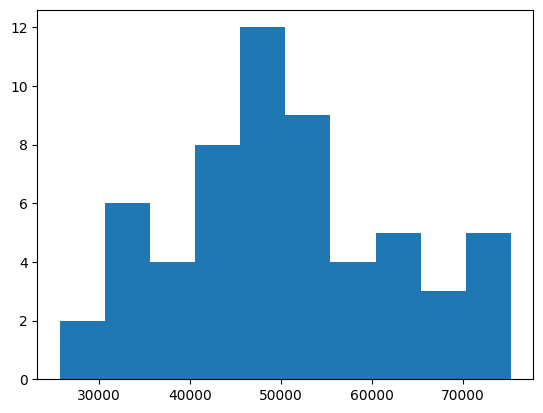

In [5]:
plt.hist(df_estatistica.loc[df_estatistica.id_municipio.isin(get_id_municipios_uf('SC')+get_id_municipios_uf('RS')+get_id_municipios_uf('PR')) & (df_estatistica.ano == 2020) & (df_estatistica.populacao >= 50000) & (df_estatistica.populacao <= 100000)].frota)

C:\Users\danil\AppData\Local\Temp\ipykernel_17132\506338796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipio.sort_values('ano', inplace=True)


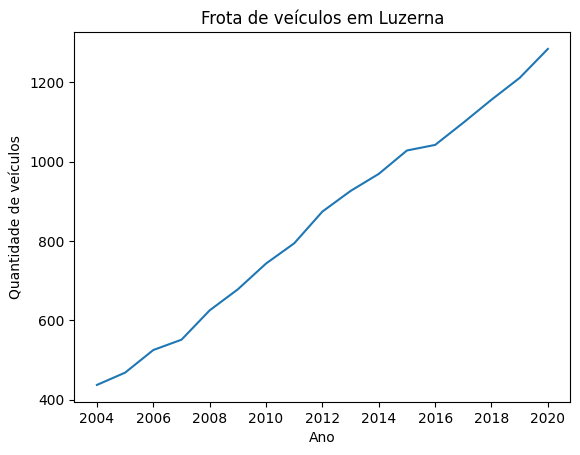

In [6]:
df_municipio = df_frota[df_frota.id_municipio == 4208955]
df_municipio.sort_values('ano', inplace=True)
plt.plot(df_municipio.ano, df_municipio.frota)
plt.title(f'Frota de veículos em Luzerna')
plt.xlabel('Ano')
plt.ylabel('Quantidade de veículos')
plt.show()


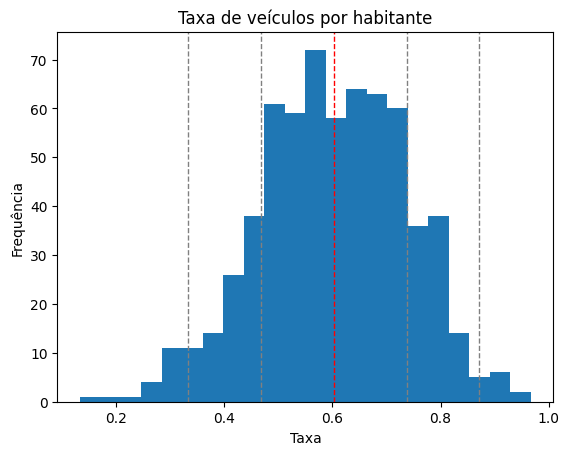

In [7]:
df_estado = df_estatistica[df_estatistica.id_municipio.isin(get_id_municipios_uf('SP'))]
dados = df_estado.loc[df_estado.ano==2020].taxa

plt.hist(dados, bins=22)

mean = np.mean(dados)
std = np.std(dados)

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)

for i in [-2,-1,1,2]:
    plt.axvline(mean+i*std, color='gray', linestyle='dashed', linewidth=1)

plt.title(f'Taxa de veículos por habitante')
plt.xlabel('Taxa')
plt.ylabel('Frequência')
plt.show()

In [8]:
len(dados[(dados>mean-2*std)&(dados<mean+2*std)]) / len(dados)

0.9550387596899225

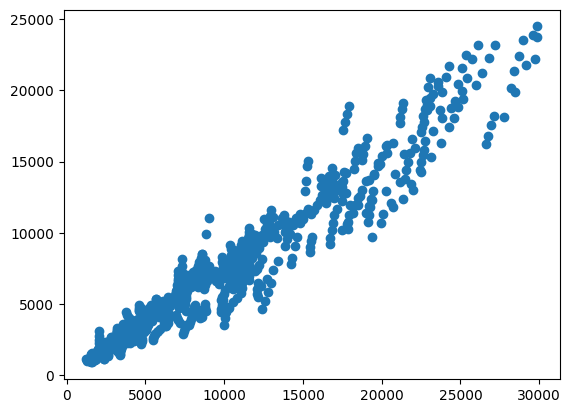

In [36]:
df = df_estatistica.loc[(df_estatistica.id_municipio.isin(get_id_municipios_uf('SC'))) & (df_estatistica.ano > 2016) &  (df_estatistica.populacao < 30000)]
plt.scatter(df.populacao, df.frota)
plt.show()

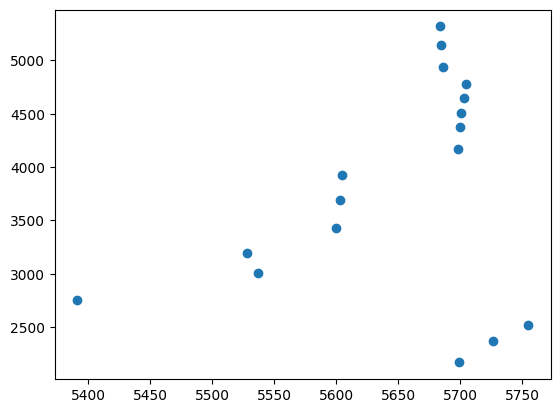

In [38]:
df = df_estatistica.loc[(df_estatistica.id_municipio == 4210035)]
plt.scatter(df.populacao, df.frota)
plt.show()